# Classification uisng Perceptrons

# Generating Data set using the rules defined in the assignment

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
#Function to generate dataset
def generate_dataset(k=20, m=100, epsilon=1):
    
    data = []
    
    def generate_vector(k=k, epsilon=epsilon):
        X = []
        
        #Assign standard normal values to X1 .. Xk-1. 
        for i in range(1, k):
            X.append(np.random.standard_normal())
        
        #Add value for Xk
        D = np.random.exponential(1)
        xk = epsilon + D
        X.append(np.random.choice([xk, -xk], size=1, p=[1/2, 1/2])[0])
        
        if X[-1] > 0: X.append(1)
        elif X[-1] < 0: X.append(-1)
        
        return X
    
    for x in range(1, m+1):
        data.append(generate_vector(k=k, epsilon=epsilon))
        
    #Create header list
    headers = ['X'+str(x) for x in range(1, k+1)] + ['Y']
    
    dataframe = pd.DataFrame(data, columns=headers)
    
    return dataframe

In [128]:
df = generate_dataset(k=20, m=100, epsilon=1)
df.shape[0]

100

# Function to Train a Perceptron on given Data set

In [270]:
#Create perceptron, returns weight vector and bias 
def fit_perceptron(dataframe, steps=10):            
    
    features = list(dataframe)[:-1]
    size = dataframe.shape[0]
    feature_size = dataframe.shape[1] - 1
    flag = 0
    count_step = 0
    steps = steps
    #print('step size: ',steps)
        
    w = np.zeros((1, feature_size))
    b = np.zeros((1,1))
    
    while count_step < steps and flag < 3:
        
        classified = 0
        misclassified = 0
        
        for i in range(0, size):
            
            df = dataframe[i: i+1]
            xi = df[features].values
            fx = np.dot(w, xi.T) + b
            fx = fx[0][0]
            Y = df['Y'].values
            
            #Checking if the point fxi is misclassified
            if (fx > 0 and Y == 1) or (fx < 0 and Y == -1):
                classified += 1
            else:
                #Updating the weights and bias
                w = w + (Y * xi)
                b = b + Y
                misclassified += 1
                
        if misclassified == 0:
            #If all data is classified 3 times then exit, ie early stopping if solution found.
            flag += 1
            #print('flag')
        
        count_step += 1
        if count_step == steps:
            print('within count steps')
            if misclassified == 0:
                print('Linear Seperator exists')
            else:
                print('Linear Seperator does not exists')
                w = None
                b = None
            flag = 10
    
    if count_step != steps:
        count_step -= flag
        
    return w, b, count_step

In [271]:
dataframe = generate_dataset(k=20, m=100, epsilon=1)
model = fit_perceptron(dataframe)
print('w: ',model[0])
print('b: ',model[1])
print('step count: ',model[2])

w:  [[-7.52488980e-01  3.95807207e-01  7.54356379e-01  2.07650748e-01
  -6.79866949e-03  8.98311652e-01  1.09932060e-01 -1.88585995e-01
   1.42785945e-01 -1.00518771e+00 -7.93178312e-01  3.44360525e-01
  -8.93683044e-01 -3.84105596e-01  3.49956014e-01  7.75927025e-01
  -1.09873392e+00  2.81203337e-01 -9.56057044e-01  1.15943738e+01]]
b:  [[0.]]
step count:  2


# Question 1

Show that there is a perceptron that correctly classifies this data. Is this perceptron unique? What is the `best'
perceptron for this data set, theoretically?

# Answer

We created a data set using k = 20, m = 100 and epsilon = 1. We generated a perceptron using the fit_perceptron function. What we get in return is a unique perceptron for every data set. There is a missclassified tag within the fit_perceptron function which keeps a track of correctly classifying the data set, using this we can see that final resulting perceptron has 0 misclassifed value. Hence we can conclude that there is a perceptron which correctly classifies the data and provides a unique result.

**What is the best perceptron for this data set ?**
The data set's classification value ie Y depends solely on value of Xk. It does not depend on any other dimensions, hence we can say if we can find a seperator between Xk values we can classify the data set. Xk is taken in such a way that probability of it containing +ve and -ve values are equal ie 1/2 - 1/2. Thus we get an even distribution of Xk values around 0, so theoretically speaking the best perceptron for this kind of data set is a line which passes throught the orign.

# Question 2

We want to consider the problem of learning perceptrons from data sets. Generate a set of data of size m = 100
with k = 20, epsilon = 1.

- Implement the perceptron learning algorithm. This data is separable, so the algorithm will terminate.
  How does the output perceptron compare to your theoretical answer in the previous problem?

**Generating data set with specification m = 100, k = 20 & epsilon = 1**

In [284]:
dataframe = generate_dataset(k=20, m=100, epsilon=1)

#Display a sample of the dataset.
dataframe.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,2.016288,0.520157,0.819648,-0.471304,-0.932002,-0.250712,-0.386587,-0.787541,-0.223924,0.959111,...,1.342768,-1.028452,-0.726026,-0.909354,-0.910110,-1.951790,1.134942,-1.401002,-2.761450,-1
1,0.836510,0.086929,0.679542,1.505357,0.688100,-0.238627,-0.614221,-0.628731,-0.032621,0.213462,...,-2.011018,-0.310826,-0.863502,-0.299576,-0.445978,0.002387,-0.379883,-0.482397,3.104264,1
2,0.229548,0.958439,0.134740,-1.453140,-1.972716,0.144745,-0.291394,1.530271,-0.097334,0.287229,...,1.970257,-0.593187,0.077726,0.500777,-0.164014,-0.929530,1.333182,-0.291446,-3.982983,-1
3,-0.413095,0.296768,0.215112,-1.001360,-0.735870,0.182527,-0.330969,-1.395908,-0.323020,-0.427214,...,0.197362,0.174228,-0.386212,-2.097806,1.512111,0.131202,0.849738,-0.845749,-1.302061,-1
4,0.408111,0.681650,0.620752,-0.177825,-1.081566,-0.559019,-0.113987,0.056979,-0.729240,-0.099213,...,-0.875368,-0.162547,-2.429337,-0.830345,0.313248,0.625081,0.230017,0.085661,2.560251,1


**Fit Perceptron Model on the Data Set**

In [285]:
model = fit_perceptron(dataframe)
print('w: ',model[0])
print('b: ',model[1])
print('step count: ',model[2])

w:  [[ 1.04945335  0.19295036 -0.85119022 -1.92453721  1.45346089  2.57447651
   0.28681202 -1.93377951 -1.28254333  1.51216912  0.83524827 -1.67902875
  -1.24866295 -2.31715025  0.1808778   0.20031529 -1.10063877  1.84633189
  -0.04561763 11.69727897]]
b:  [[0.]]
step count:  2


# Inference

Observe the w, b & step count values of the above results. You see that b = 0 which indicates that our perceptron's seperating line has intercept of 0, which tells us that the seperating line passes through the orign for this data set. Similar to what we have stated in Question 1, that theoretically our line seperator passes through the origin.

# Question 3

For any given data set, there may be multiple separators with multiple margins - but for our data set, we can
effectively control the size of the margin with the parameter epsilon - the bigger this value, the bigger the margin of
our separator.

- For m = 100, k = 20, generate a data set for a given value of epsilon and run the learning algorithm to
  completion. Plot, as a function of epsilon within [0, 1], the average or typical number of steps the algorithm needs to
  terminate. Characterize the dependence.

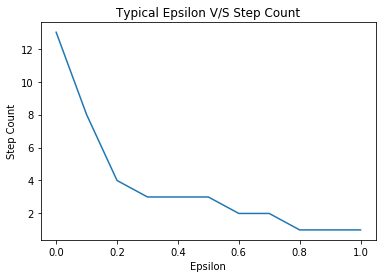

In [293]:
m = 100
k = 20
step_threshold = 100
epsilon_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
eclist = {}

for epsilon in epsilon_list:
    eclist[epsilon] = fit_perceptron(generate_dataset(k=k, m=m, epsilon=epsilon), steps=step_threshold)[2]
    
plot_list = sorted(eclist.items())
x,y = zip(*plot_list)

plt.plot(x,y)
plt.title('Typical Epsilon V/S Step Count')
plt.xlabel('Epsilon')
plt.ylabel('Step Count')
plt.show()

# Inference

We classify the data set using perceptrons with varying value of epsilon between 0 & 1. We plot the step count for every epsilon value. Observe that for values of epsilon below 0.2 needs a lot of computation steps to fit a correct perceptron, but the step count decreases linearly as we go from 0 to 0.2. Moving from epsilon 0.2 to 1 we see that the step count decreases very slowly. Where we observe that for epsilon = 1 it only takes 1 step to compute the correct perceptron for this data set.  

# Question 4

One of the nice properties of the perceptron learning algorithm (and perceptrons generally) is that learning the weight vector w and bias value b is typically independent of the ambient dimension. To see this, consider the following experiment:

- Fixing m = 100; epsilon = 1, consider generating a data set on k features and running the learning algorithm on
  it. Plot, as a function k (for k = 2, ..., 40), the typical number of steps to learn a perceptron on a data set of this size. How does the number of steps vary with k? Repeat for m = 1000.

**Computing for m = 100**

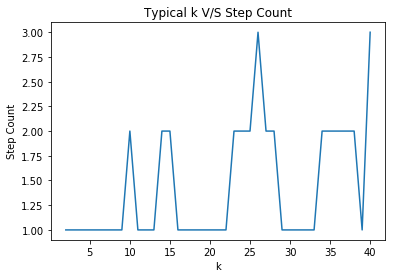

In [304]:
m = 100
step_threshold = 100
epsilon = 1
kclist = {}

for k in range(2, 41):
    kclist[k] = fit_perceptron(generate_dataset(k=k, m=m, epsilon=epsilon), steps=step_threshold)[2]
    
plot_list = sorted(kclist.items())
x,y = zip(*plot_list)

plt.plot(x,y)
plt.title('Typical k V/S Step Count')
plt.xlabel('k')
plt.ylabel('Step Count')
plt.show()

**Inference**

From the above plot we can observe that, when we vary the value of k between 2 to 40 we see random step counts between 1 to 3. Which leads us to belive that the number of steps taken to correctly classify a perceptron does not depend on value of k. Alternatively from the definition of our data set we can see that the value of Y depends solely on value of Xk, we can conclude that value of k is not correlated with step count.


**Computing for m = 1000**

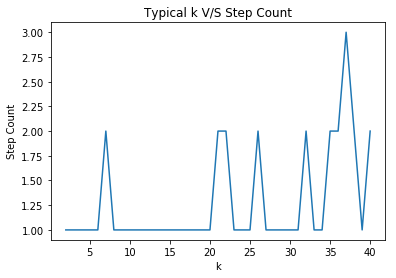

In [305]:
m = 1000
step_threshold = 100
epsilon = 1
kclist = {}

for k in range(2, 41):
    kclist[k] = fit_perceptron(generate_dataset(k=k, m=m, epsilon=epsilon), steps=step_threshold)[2]
    
plot_list = sorted(kclist.items())
x,y = zip(*plot_list)

plt.plot(x,y)
plt.title('Typical k V/S Step Count')
plt.xlabel('k')
plt.ylabel('Step Count')
plt.show()

**Inference**

As observed previously using the chart of k v/s step count when m = 100. Varying the value of m does not affect the value of step count for every value of k.

# Question 5

As shown in class, the perceptron learning algorithm always terminates in finite time - if there is a separator. Consider generating non-separable data in the following way: generate each X1, ... , Xk as i.i.d. standard normals N(0; 1). Define Y by:

                                       Y = +1 if Sum(Xi ^ 2) >= k ; else -1

For data defined in this way, there is no universally applicable linear separator.

For k = 2, m = 100, generate a data set that is not linearly separable. (How can you verify this?) Then run the perceptron learning algorithm. What does the progression of weight vectors and bias values look like over time? If there is no separator, this will never terminate - is there any condition or heuristic you could use to determine whether or not to terminate the algorithm and declare no separator found?

**Modifying generate_data set function to encorporate the changes mentioned above**

In [315]:
#Function to generate dataset
def mod_generate_dataset(k=2, m=100, epsilon=1):
    
    data = []
    
    def generate_vector(k=k, epsilon=epsilon):
        X = []
        
        #Assign standard normal values to X1 .. Xk-1. 
        for i in range(1, k+1):
            X.append(np.random.standard_normal())
        
        if sum([i ** 2 for i in X]) >= k: X.append(1)
        else: X.append(-1)
        
        return X
    
    for x in range(1, m+1):
        data.append(generate_vector(k=k, epsilon=epsilon))
        
    #Create header list
    headers = ['X'+str(x) for x in range(1, k+1)] + ['Y']
    
    dataframe = pd.DataFrame(data, columns=headers)
    
    return dataframe

**Generate modified dataset**

In [316]:
mod_dataset = mod_generate_dataset(k=2, m=100, epsilon=1)
mod_dataset.head()

,X1,X2,Y
0,-0.118174,0.571907,-1
1,0.572557,-1.801474,1
2,1.416119,0.201163,1
3,0.754430,-0.084939,-1
4,1.148599,-1.065626,1


**Plot X1 vs X2 and Y as color coded**

<function matplotlib.pyplot.show>

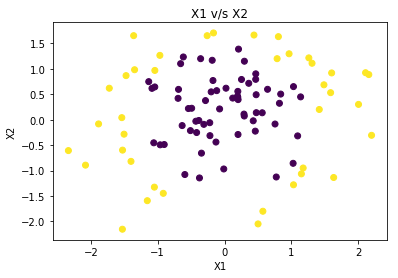

In [344]:
X1 = mod_dataset['X1'].values
X2 = mod_dataset['X2'].values
Y = mod_dataset['Y'].values

plt.scatter(X1, X2, c=Y)
plt.title('X1 v/s X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show

**How can you verify the data set is not linearly seperable ?**

We plot the X1 v/s X2 data set and color code the Y values for every X1, X2 pair; we get the above plot. What we can infer by looking at the above plot is that for value of Y = -1 we have a different color and for Y = 1 the point has different color; we can say that there exit no single line which can seperate values of Y = -1 and Y = 1. Hence the dataset is not linearly seperable

**Modify the perceptron function to print vectors of w and b on every time step**

In [346]:
#Create perceptron, returns weight vector and bias 
def mod_fit_perceptron(dataframe, steps=10):            
    
    features = list(dataframe)[:-1]
    size = dataframe.shape[0]
    feature_size = dataframe.shape[1] - 1
    flag = 0
    count_step = 0
    steps = steps
    wstep = {}
    bstep = {}
    #print('step size: ',steps)
        
    w = np.zeros((1, feature_size))
    b = np.zeros((1,1))
    
    print('Step: ',count_step,' ie Initial vector.')
    print('w: ',w)
    print('b: ',b)
    print('\n')
    
    wstep[count_step] = w
    bstep[count_step] = b
    
    while count_step < steps and flag < 3:
        
        classified = 0
        misclassified = 0
        
        for i in range(0, size):
            
            df = dataframe[i: i+1]
            xi = df[features].values
            fx = np.dot(w, xi.T) + b
            fx = fx[0][0]
            Y = df['Y'].values
            
            #Checking if the point fxi is misclassified
            if (fx > 0 and Y == 1) or (fx < 0 and Y == -1):
                classified += 1
            else:
                #Updating the weights and bias
                w = w + (Y * xi)
                b = b + Y
                misclassified += 1
        
        print('Step: ',count_step+1)
        print('w: ',w)
        print('b: ',b)
        print('\n')
        
        wstep[count_step+1] = w
        bstep[count_step+1] = b
        
        if misclassified == 0:
            #If all data is classified 3 times then exit, ie early stopping if solution found.
            flag += 1
            #print('flag')
        
        count_step += 1
        if count_step == steps:
            print('within count steps')
            if misclassified == 0:
                print('Linear Seperator exists')
            else:
                print('Linear Seperator does not exists')
                w = None
                b = None
            flag = 10
    
    if count_step != steps:
        count_step -= flag
        
    return w, b, count_step, wstep, bstep

**Run mod fit perceptron using above mod data set**

In [382]:
model = mod_fit_perceptron(mod_dataset, steps=100)

Step:  0  ie Initial vector.
w:  [[0. 0.]]
b:  [[0.]]


Step:  1
w:  [[-0.97787948 -0.76930681]]
b:  [[-1.]]


Step:  2
w:  [[-0.6804935  -0.69913192]]
b:  [[-1.]]


Step:  3
w:  [[-0.70781291 -0.27567595]]
b:  [[-1.]]


Step:  4
w:  [[-0.75925609 -0.43584935]]
b:  [[-1.]]


Step:  5
w:  [[-0.81069926 -0.59602274]]
b:  [[-1.]]


Step:  6
w:  [[-0.6572329  -0.67055299]]
b:  [[-1.]]


Step:  7
w:  [[-0.68455231 -0.24709701]]
b:  [[-1.]]


Step:  8
w:  [[-0.73599549 -0.40727041]]
b:  [[-1.]]


Step:  9
w:  [[-0.7633149   0.01618556]]
b:  [[-1.]]


Step:  10
w:  [[-0.13053718 -0.55557533]]
b:  [[-2.]]


Step:  11
w:  [[-0.32391211 -1.1175303 ]]
b:  [[-2.]]


Step:  12
w:  [[-0.79629355 -0.58475321]]
b:  [[-1.]]


Step:  13
w:  [[-0.82361296 -0.16129723]]
b:  [[-1.]]


Step:  14
w:  [[-0.67572295 -0.09724061]]
b:  [[-1.]]


Step:  15
w:  [[-0.04294523 -0.6690015 ]]
b:  [[-2.]]


Step:  16
w:  [[-0.63474019 -1.58429918]]
b:  [[-2.]]


Step:  17
w:  [[-0.50605556 -0.19310684]]
b:  [[-1.]]


S

**Lets look at how the values of w1, w2, b changes over time**

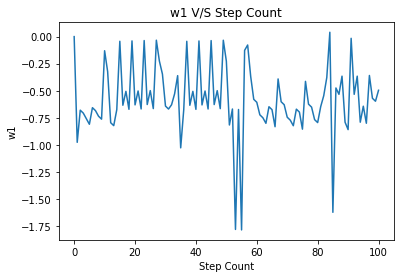

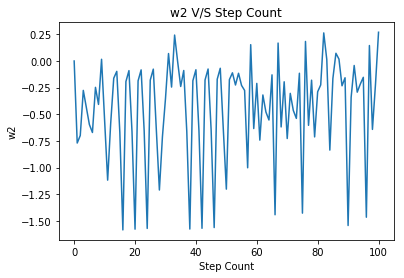

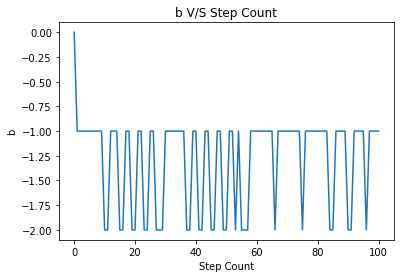

In [383]:
w = model[3]
plot_list = sorted(w.items())
x,y = zip(*plot_list)
w1 = [i[0][0] for i in y]
w2 = [i[0][1] for i in y]

plt.plot(x, w1)
plt.title('w1 V/S Step Count')
plt.xlabel('Step Count')
plt.ylabel('w1')
plt.show()

plt.plot(x, w2)
plt.title('w2 V/S Step Count')
plt.xlabel('Step Count')
plt.ylabel('w2')
plt.show()

b = model[4]
plot_list = sorted(b.items())
x,y = zip(*plot_list)
y = [i[0][0] for i in y]

plt.plot(x,y)
plt.title('b V/S Step Count')
plt.xlabel('Step Count')
plt.ylabel('b')
plt.show()

# Inference

We have plotted the change in value of w1, w2 & b over time. Observing that we can infer that there is a pattern between w1, w2 & over time. This pattern is repeated for 3 to 4 time as seen above.

Fitting perceptron for 1000 steps did not lead us to a correctly classified perceptron. Futhermore using the heuristics found above i.e. the reoccuring pattern for the values of w1, w2 & b. We can say if the same pattern occurs more than 2 time we can terminate the algorithm and declare no seperator found!